## 1. Problem
Given some parameters we need to find whether a customer will get personal laon or not.

  * **Explanation:** It is a Binary Classification problem since here the outputs will be either a person will get the loan(1) or will not get the loan(0).
  * **Data:** The dataset used in this project is a csv and labelled data and can be found in the dataset folder of this project repository additionally it can also be found through the URL:
  https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data
  * **Approach:** This problem can also be solved using the conventional ML Algorithms but since we are focused on learning Deep Learning techniques will solve this problem using Deep Learning

In [1]:
# Making all the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

## 2. Data

In [2]:
df=pd.read_csv("loan_approval_dataset.csv")

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


**Description about the dataset**

- loan_id
- no_of_dependents: Number of Dependents of the Applicant
- education: Education of the Applicant (Graduate/Not Graduate)
- self_employed: Employment Status of the Applicant
- income_annum: Annual Income of the Applicant
- loan_amount: Loan Amount
- loan_term: Loan Term in Years
- cibil_score: Credit Score
- residential_assets_value
- commercial_assets_value
- luxury_assets_value
- bank_asset_value
- loan_status: Loan Approval Status (Approved/Rejected)




We already got a basic picture of this dataset, let's run some data cleaning

In [4]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
for i in df.columns:
  dis = len(df[i].unique())
  print(f"{i} - {dis}")

loan_id - 4269
 no_of_dependents - 6
 education - 2
 self_employed - 2
 income_annum - 98
 loan_amount - 378
 loan_term - 10
 cibil_score - 601
 residential_assets_value - 278
 commercial_assets_value - 188
 luxury_assets_value - 379
 bank_asset_value - 146
 loan_status - 2


By the data cleaning scans, we have confirmed:

1. There is no null value and duplicated value in this dataset.
2. no_of_dependents, education, self_employed and loan_status are categorical columns.
3. There are a total 4269 rows in this dataset, with 13 columns (features).
4. There are 2656 data with an approved loan_status, which is about 62.2% compared to the "rejected" group. The dataset is slightly imbalanced but it is acceptable and we don't need to rebalance it.
5. Other columns are numerical.

This dataset is very clean and we don't need to take any extra data cleaning steps at this moment.


Wait, not yet, I notice a small detail over the columns' names, take a look:

In [8]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

Except `loan_id`, all the column names contain a space in front of the text, we need to trim them up to avoid future confusions.

In [9]:
df.columns = df.columns.str.replace(' ', '')

In [10]:
# Check it out again
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

## 3. ENCODING CATEGORICAL DATA

Neural Networks or any conventinal ML Algorithmns tend to prefer numerical data and perform better on the numerical data hence it is very important to convert categorical fetures into the numerical form.

There are many ways to do this like using `pd.dummies()` `OneHotEncoding` or `OrdinalEncoding` however it depends on problemto problem and developer to developer to choose which ever is suitable.

In [11]:
# converting the loan_status column into numerical form
from sklearn.preprocessing import OrdinalEncoder
rank=[' Rejected',' Approved']
oe = OrdinalEncoder(categories=[rank])
df['loan_status'] = oe.fit_transform(df[['loan_status']])
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0


In [12]:
# converting the education column into numerical form
rank=[' Not Graduate',' Graduate']
oe = OrdinalEncoder(categories=[rank])
df['education'] = oe.fit_transform(df[['education']])
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1.0,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,2,0,0.0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,3,1.0,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,4,3,1.0,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,5,0.0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0


In [13]:
# converting the self_employed column into numerical
oe = OrdinalEncoder()
df['self_employed'] = oe.fit_transform(df[['self_employed']])

In [14]:
# Let's look out our dataset once again
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,2,0,0.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,3,1.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,4,3,1.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,5,0.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0


## 4. EDA (EXPLOATRY DATA ANALYSIS)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

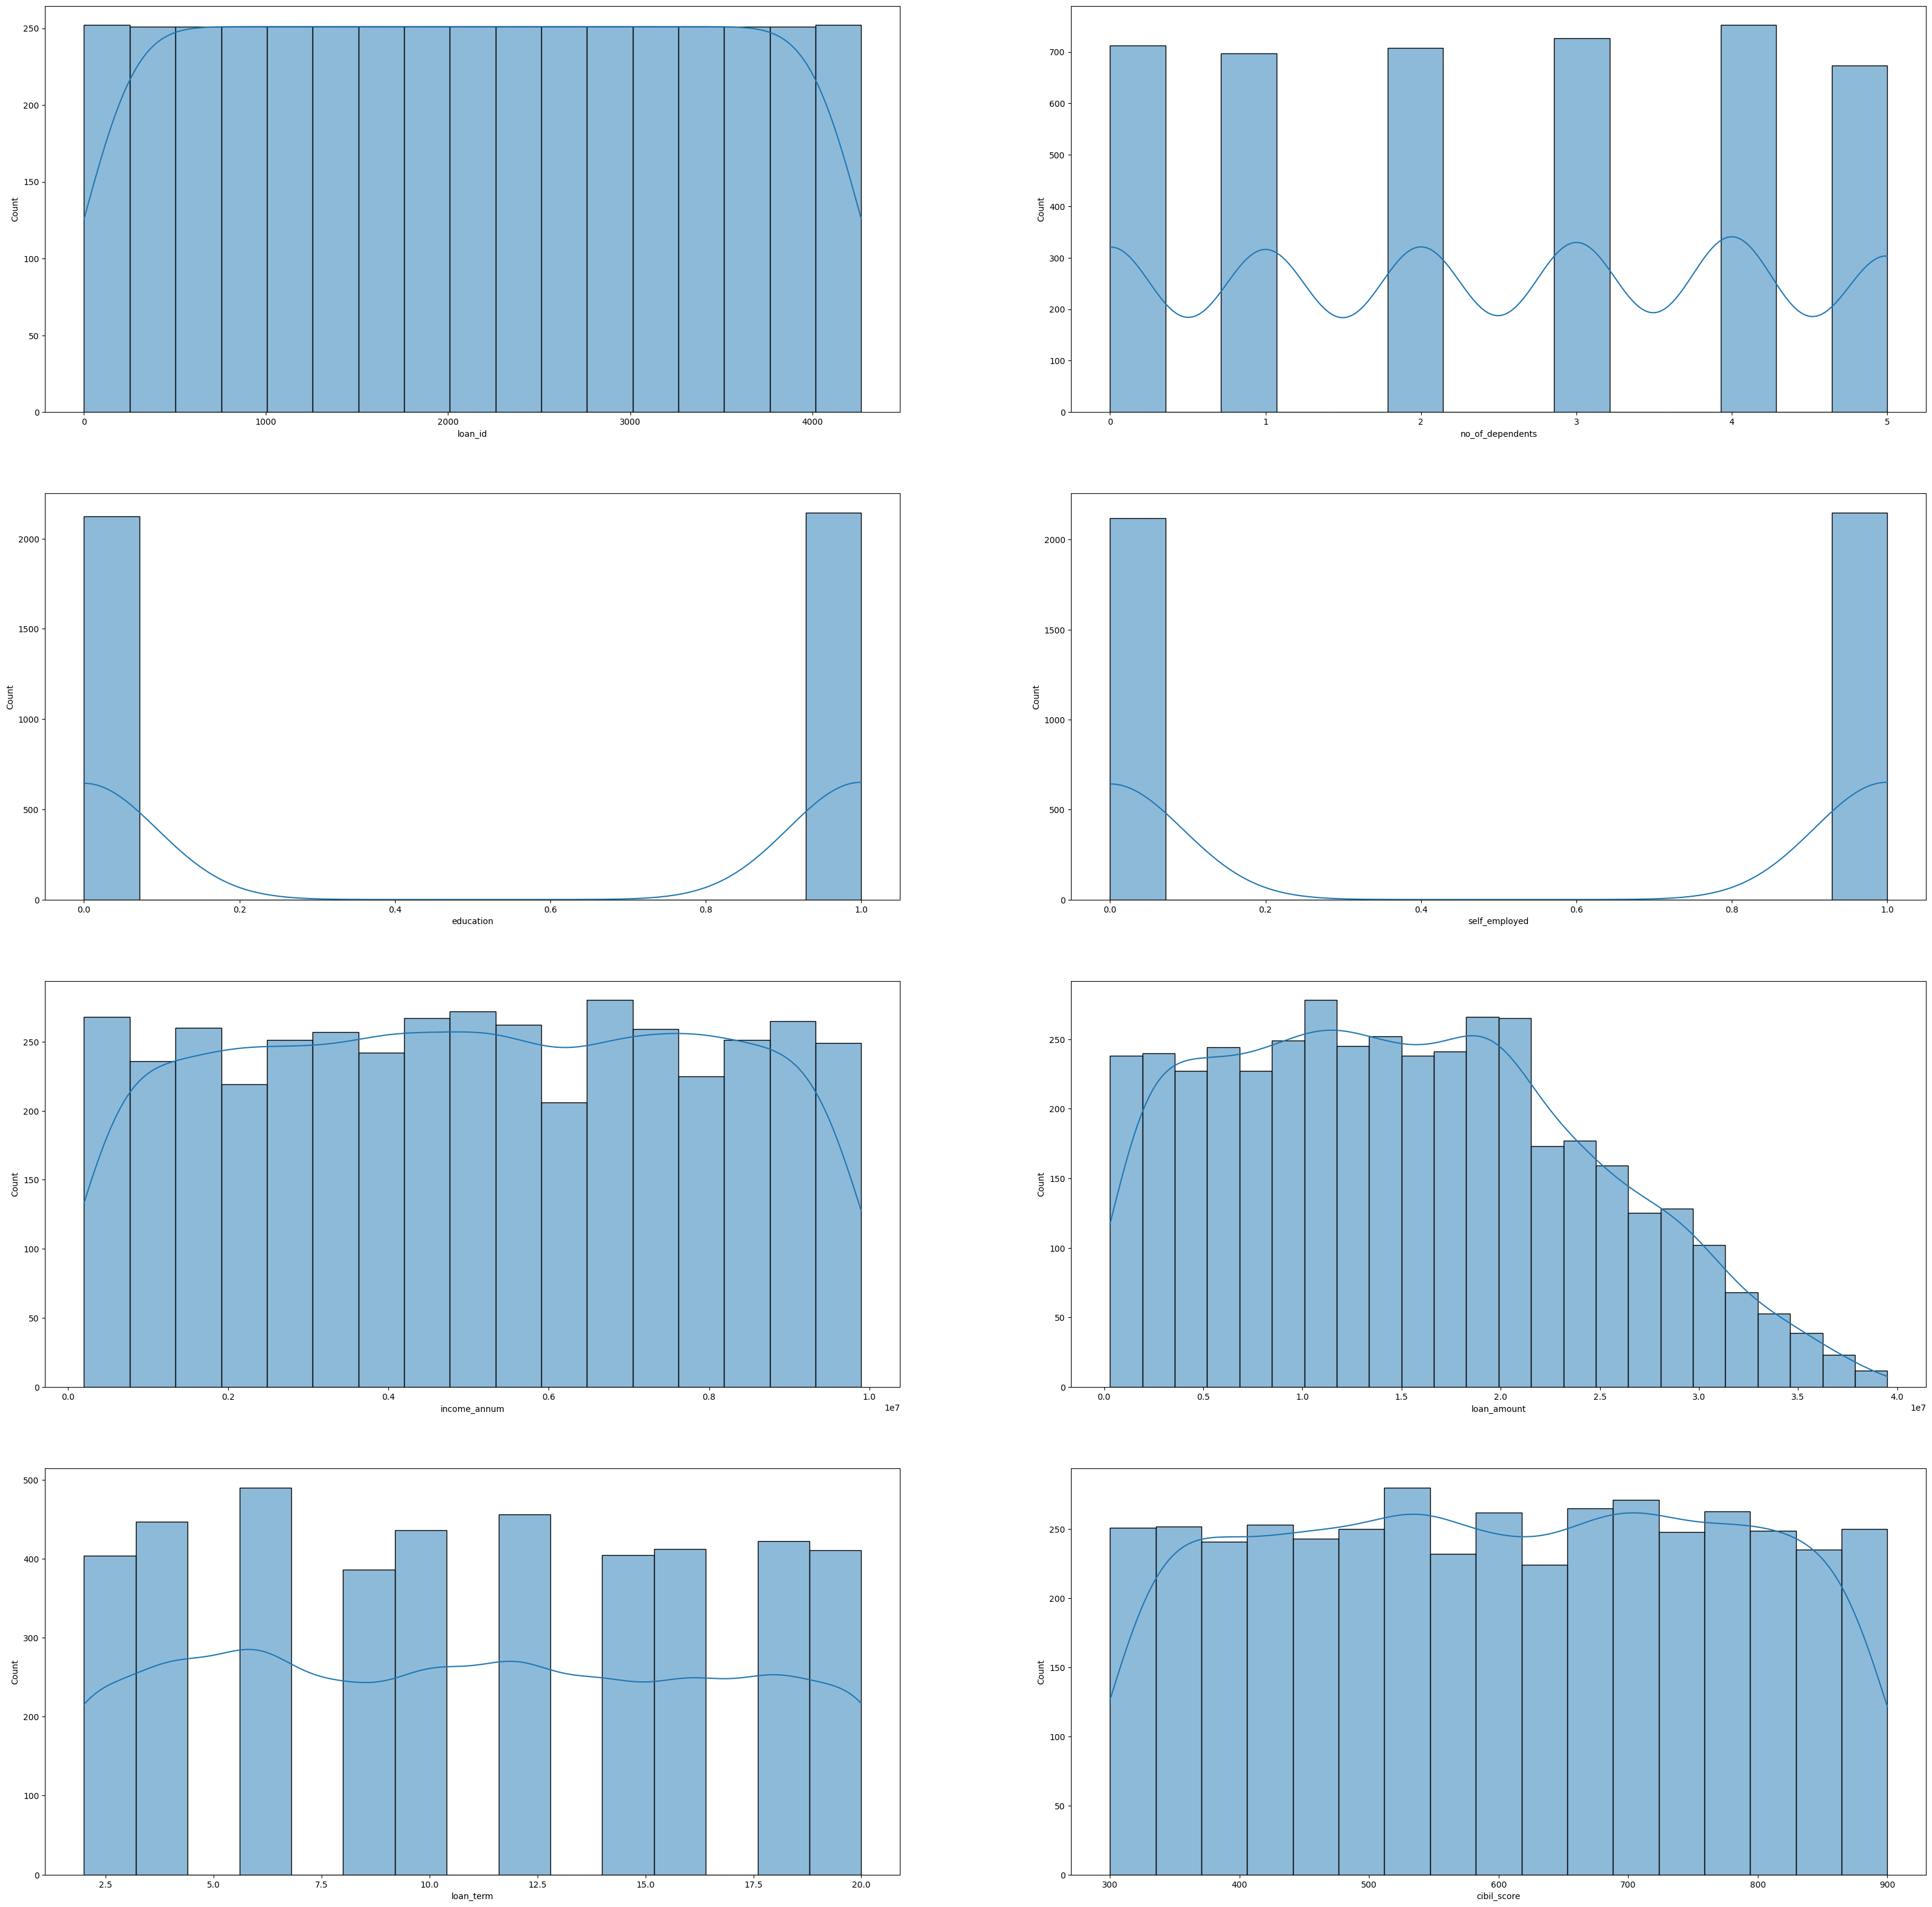

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=2)
axes = axes.flatten()
fig.set_size_inches(40, 40)

for ax, col in zip(axes, df.columns):
    sns.histplot(df[col], ax=ax, kde=True)  # Updated to sns.histplot since sns.distplot is deprecated

# Save the figure
fig.savefig('distribution_plots.png', bbox_inches='tight')


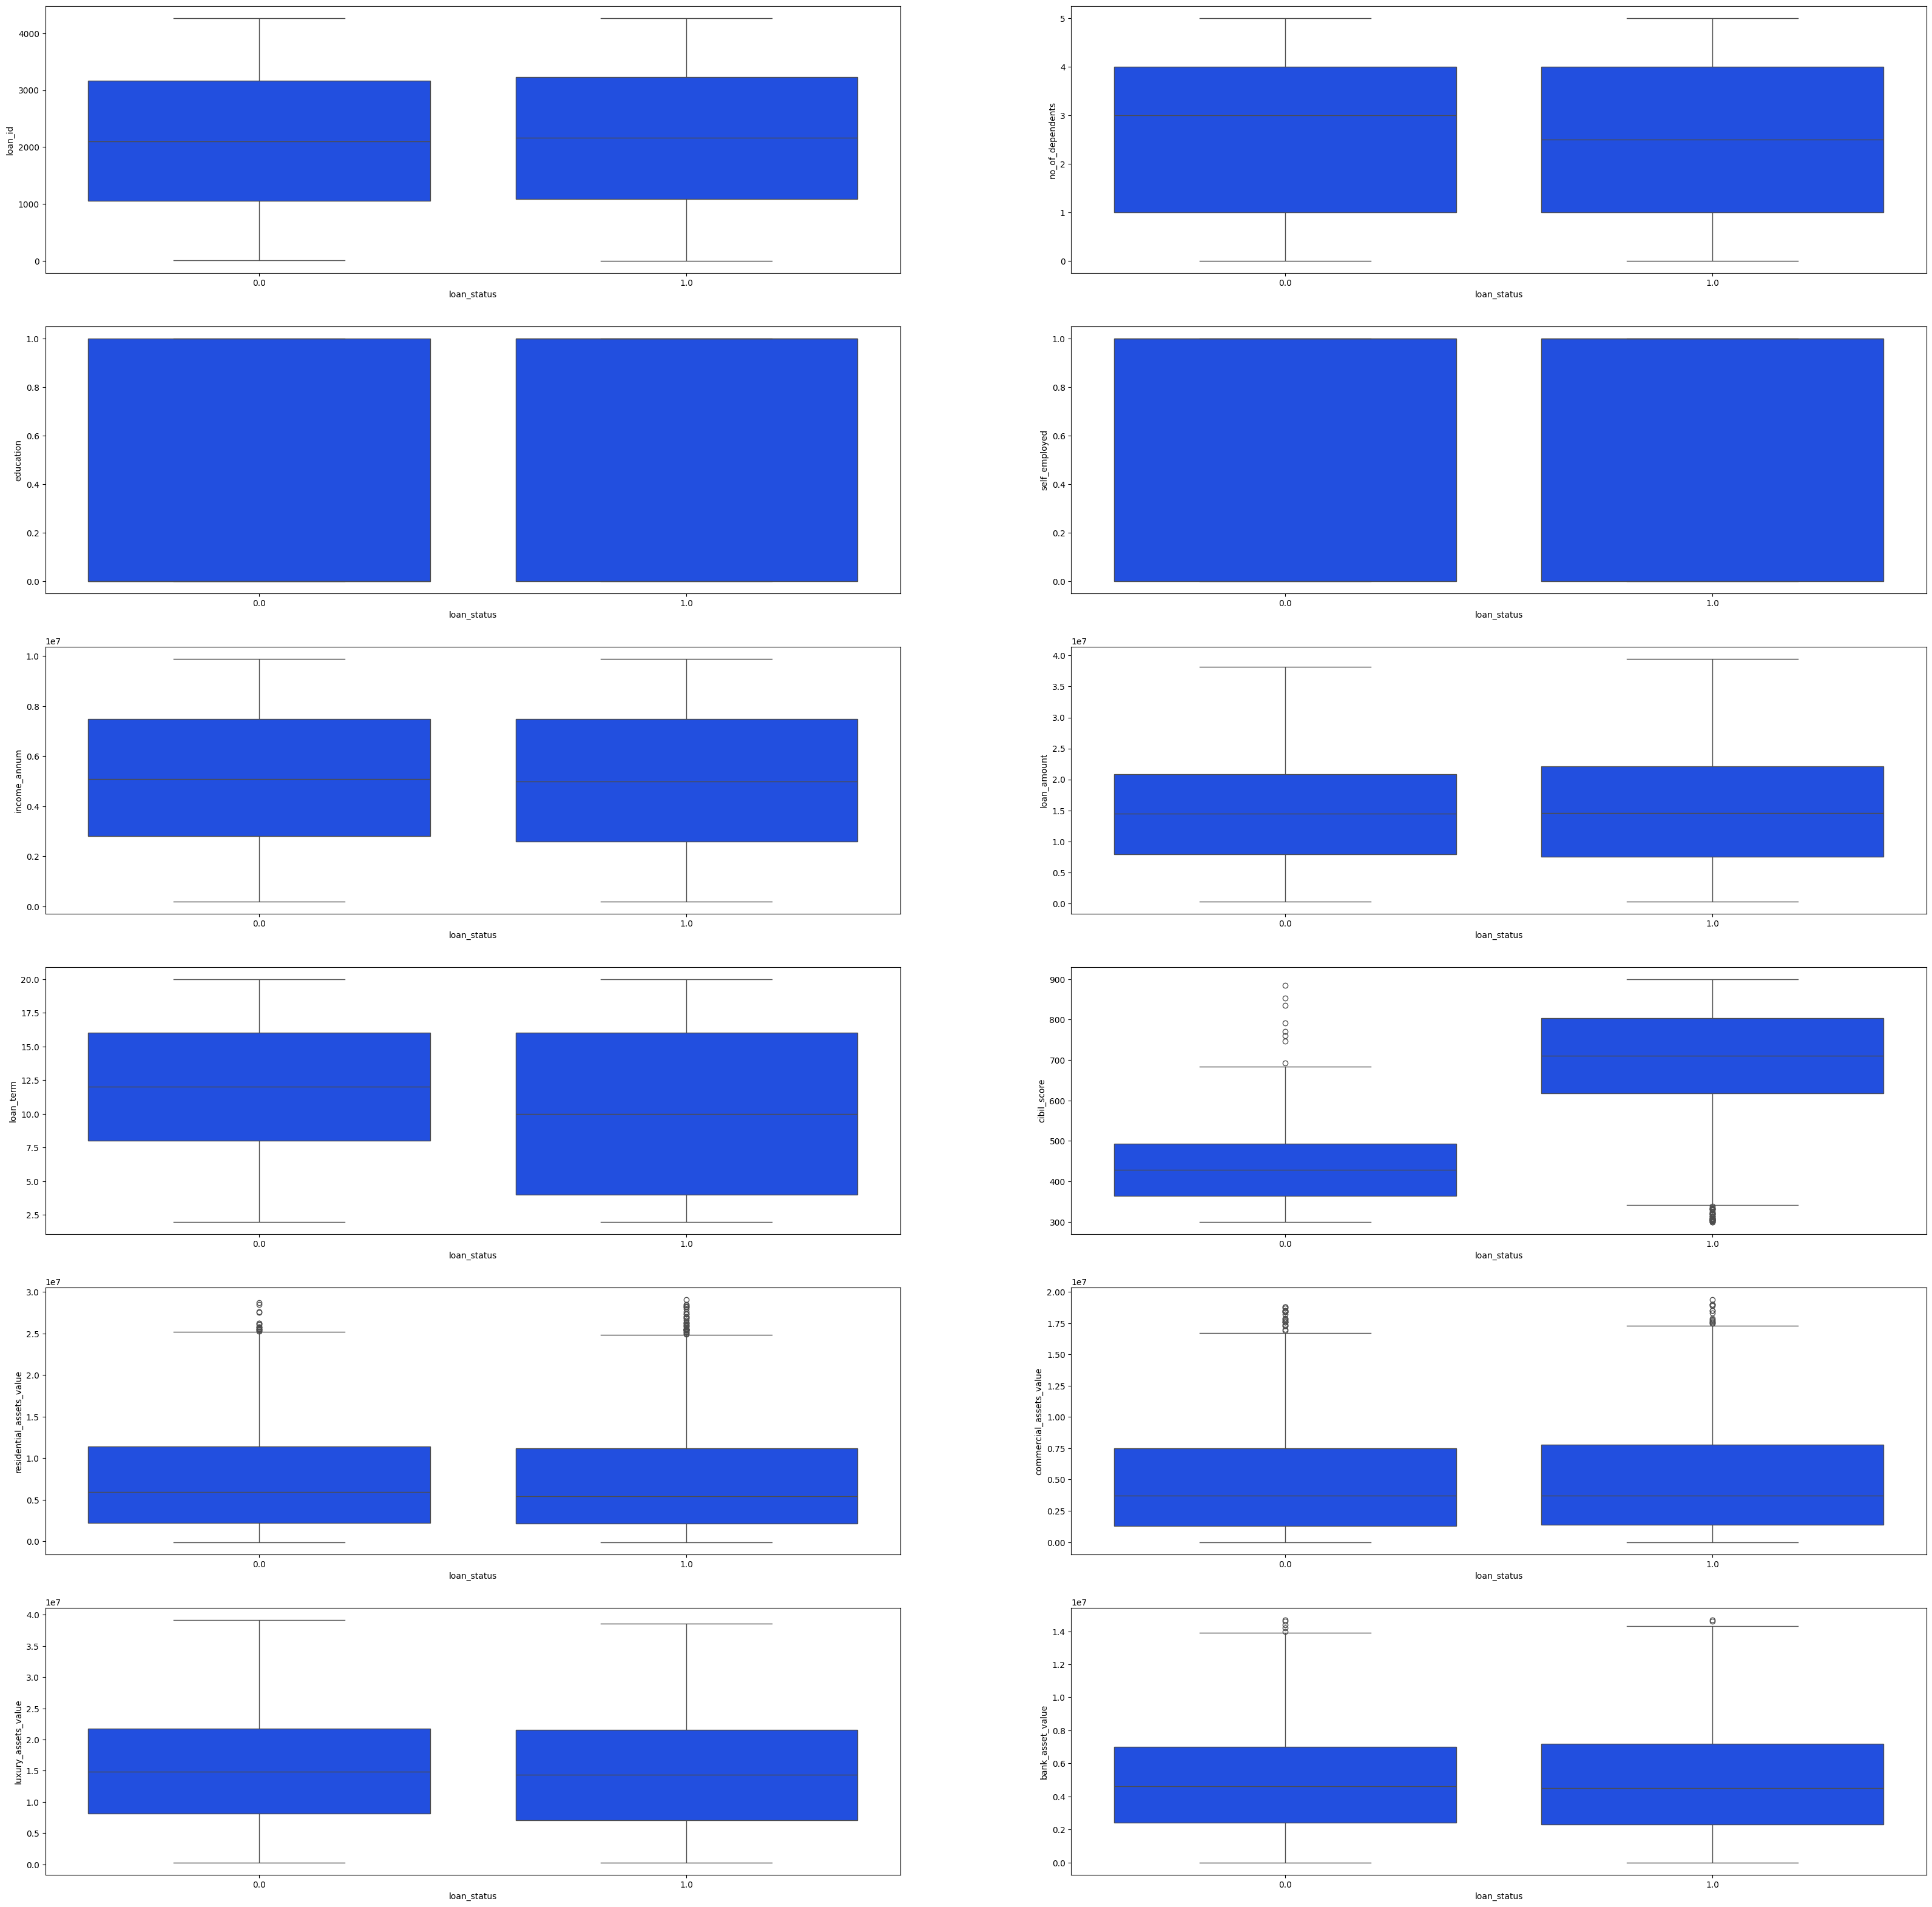

In [17]:
sns.set_palette("bright")
fig, axes = plt.subplots(nrows = 6, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.boxplot(x='loan_status',y=df[col], ax = ax , data=df)

In [18]:
df.drop(['loan_id'],axis=1,inplace=True)

<Axes: >

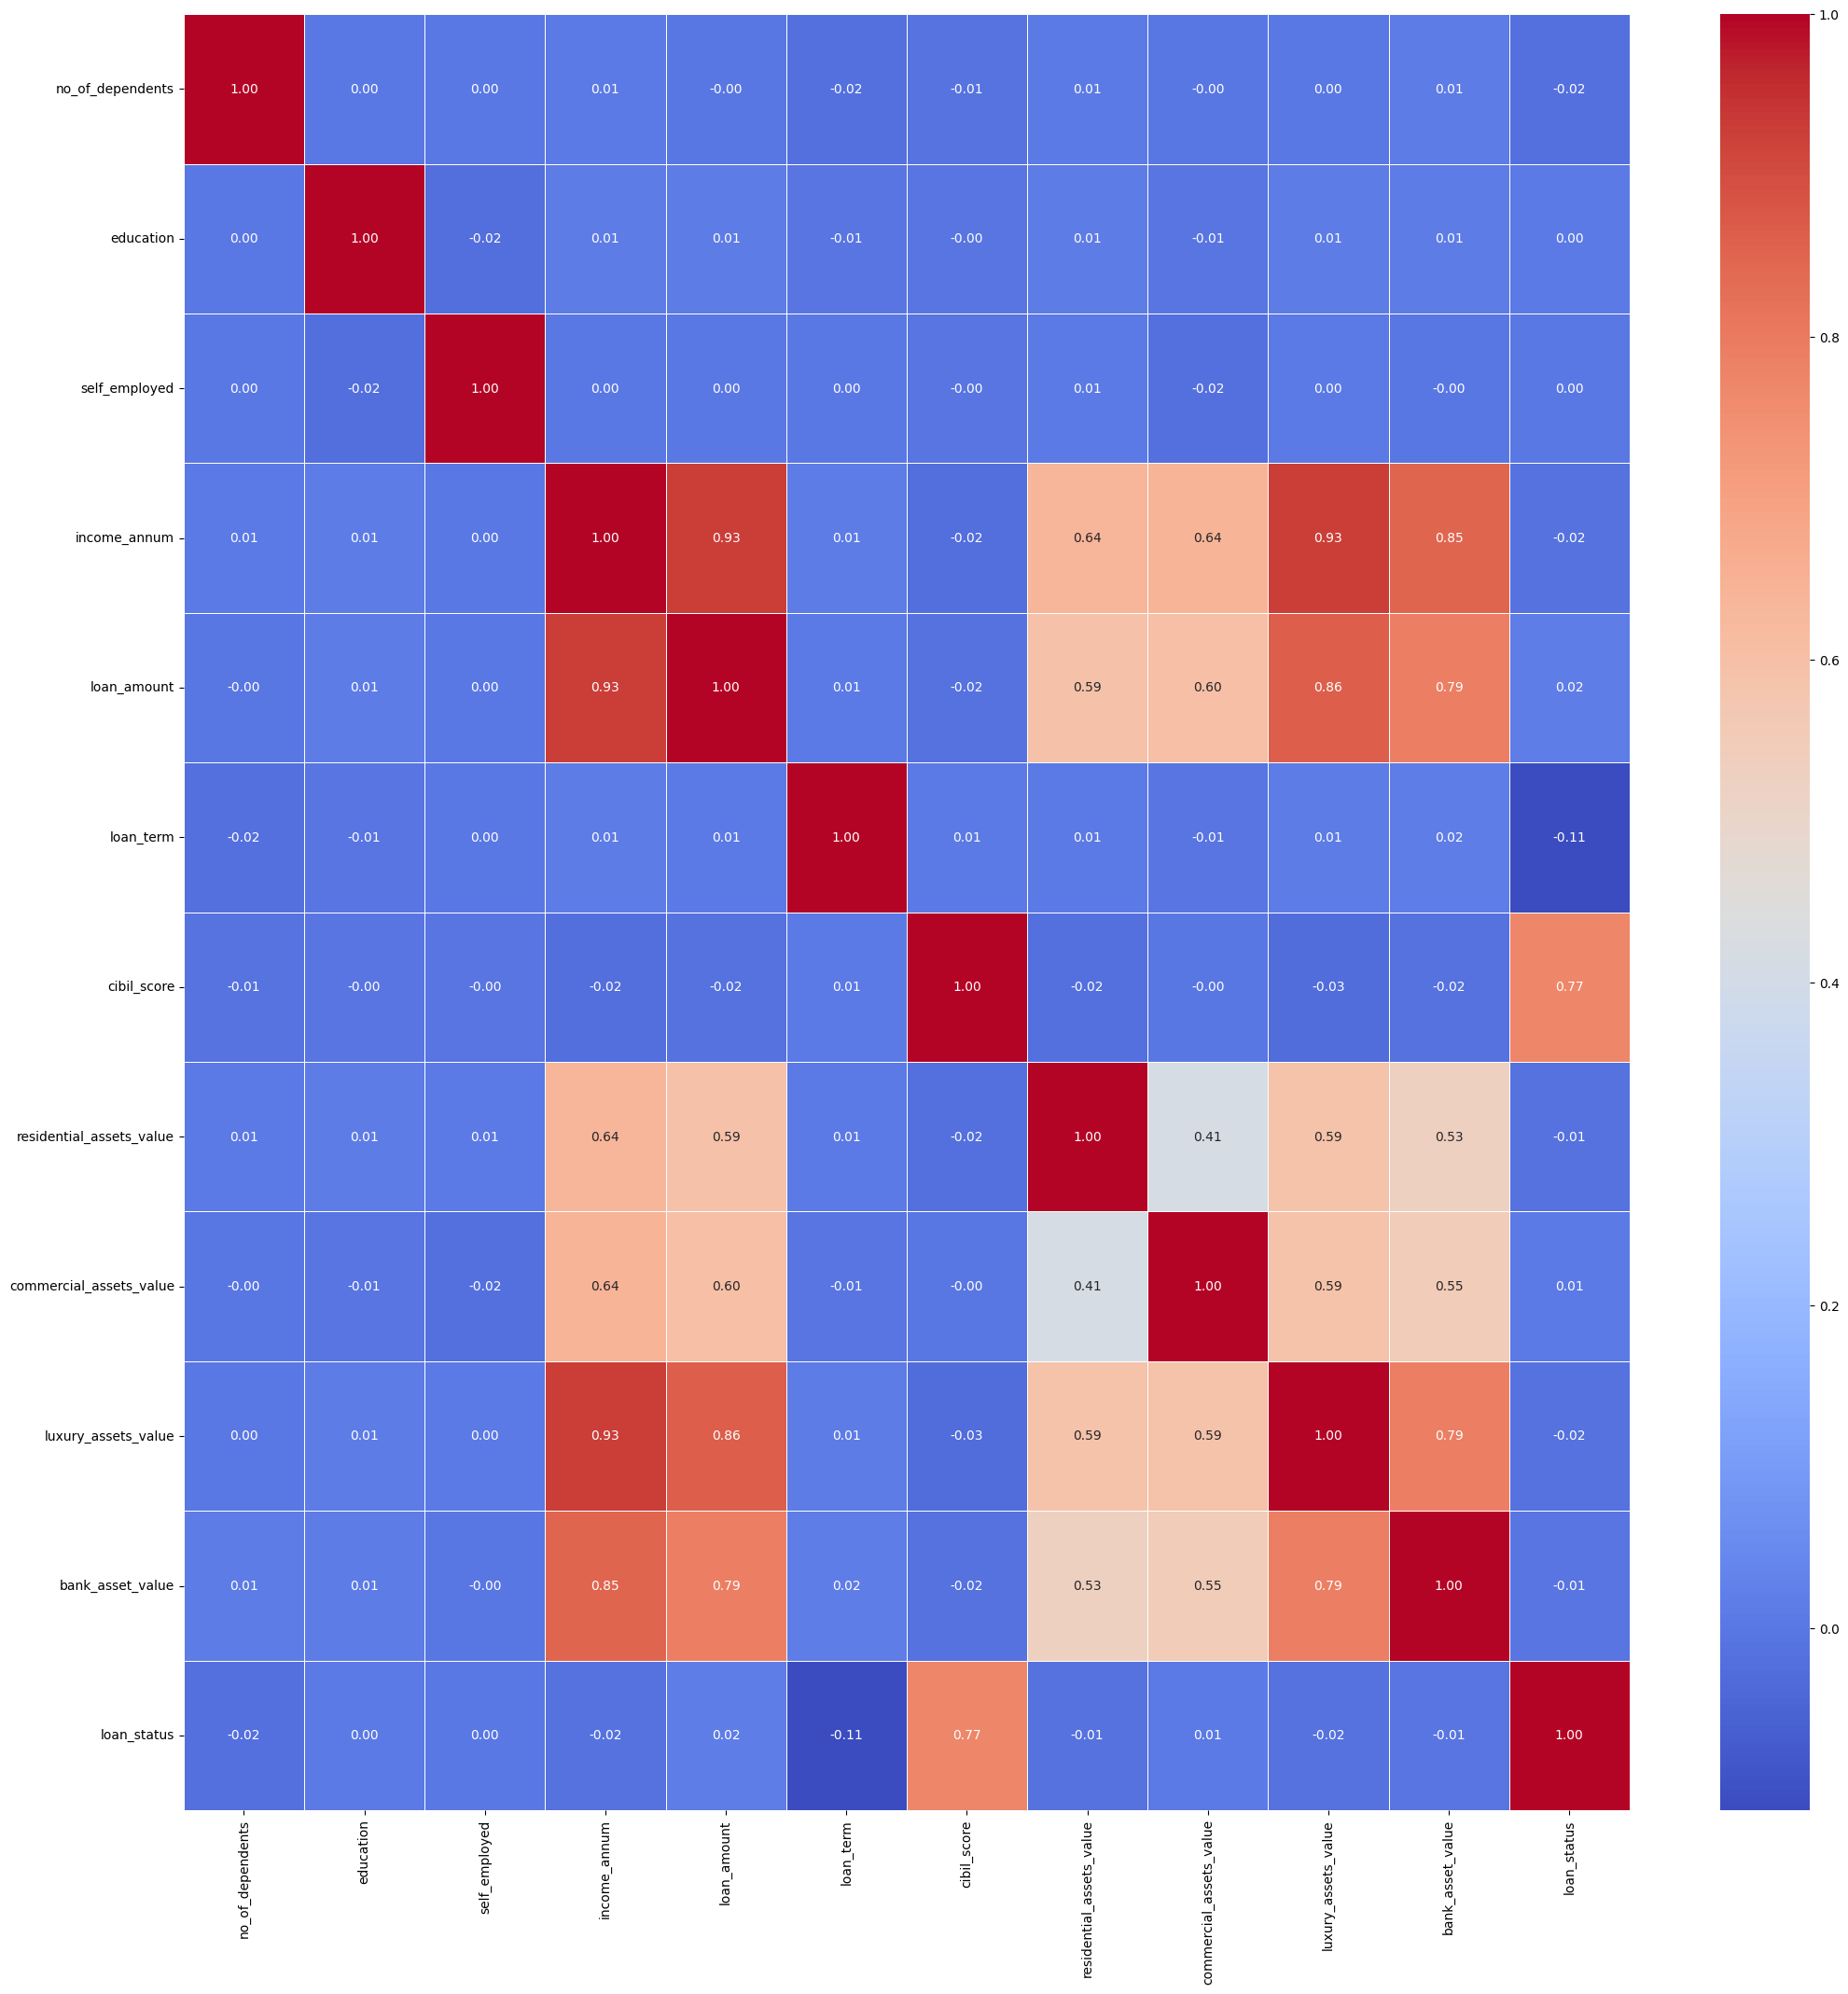

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

> **WILL DROP CORR 0.00 AND ALSO ONE OF THE FEATURES MORE THAN .85 CORR**

In [20]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [21]:
df.drop(['education','self_employed'],axis=1,inplace=True)

In [22]:
df.drop(['income_annum','loan_amount'],axis=1,inplace=True)

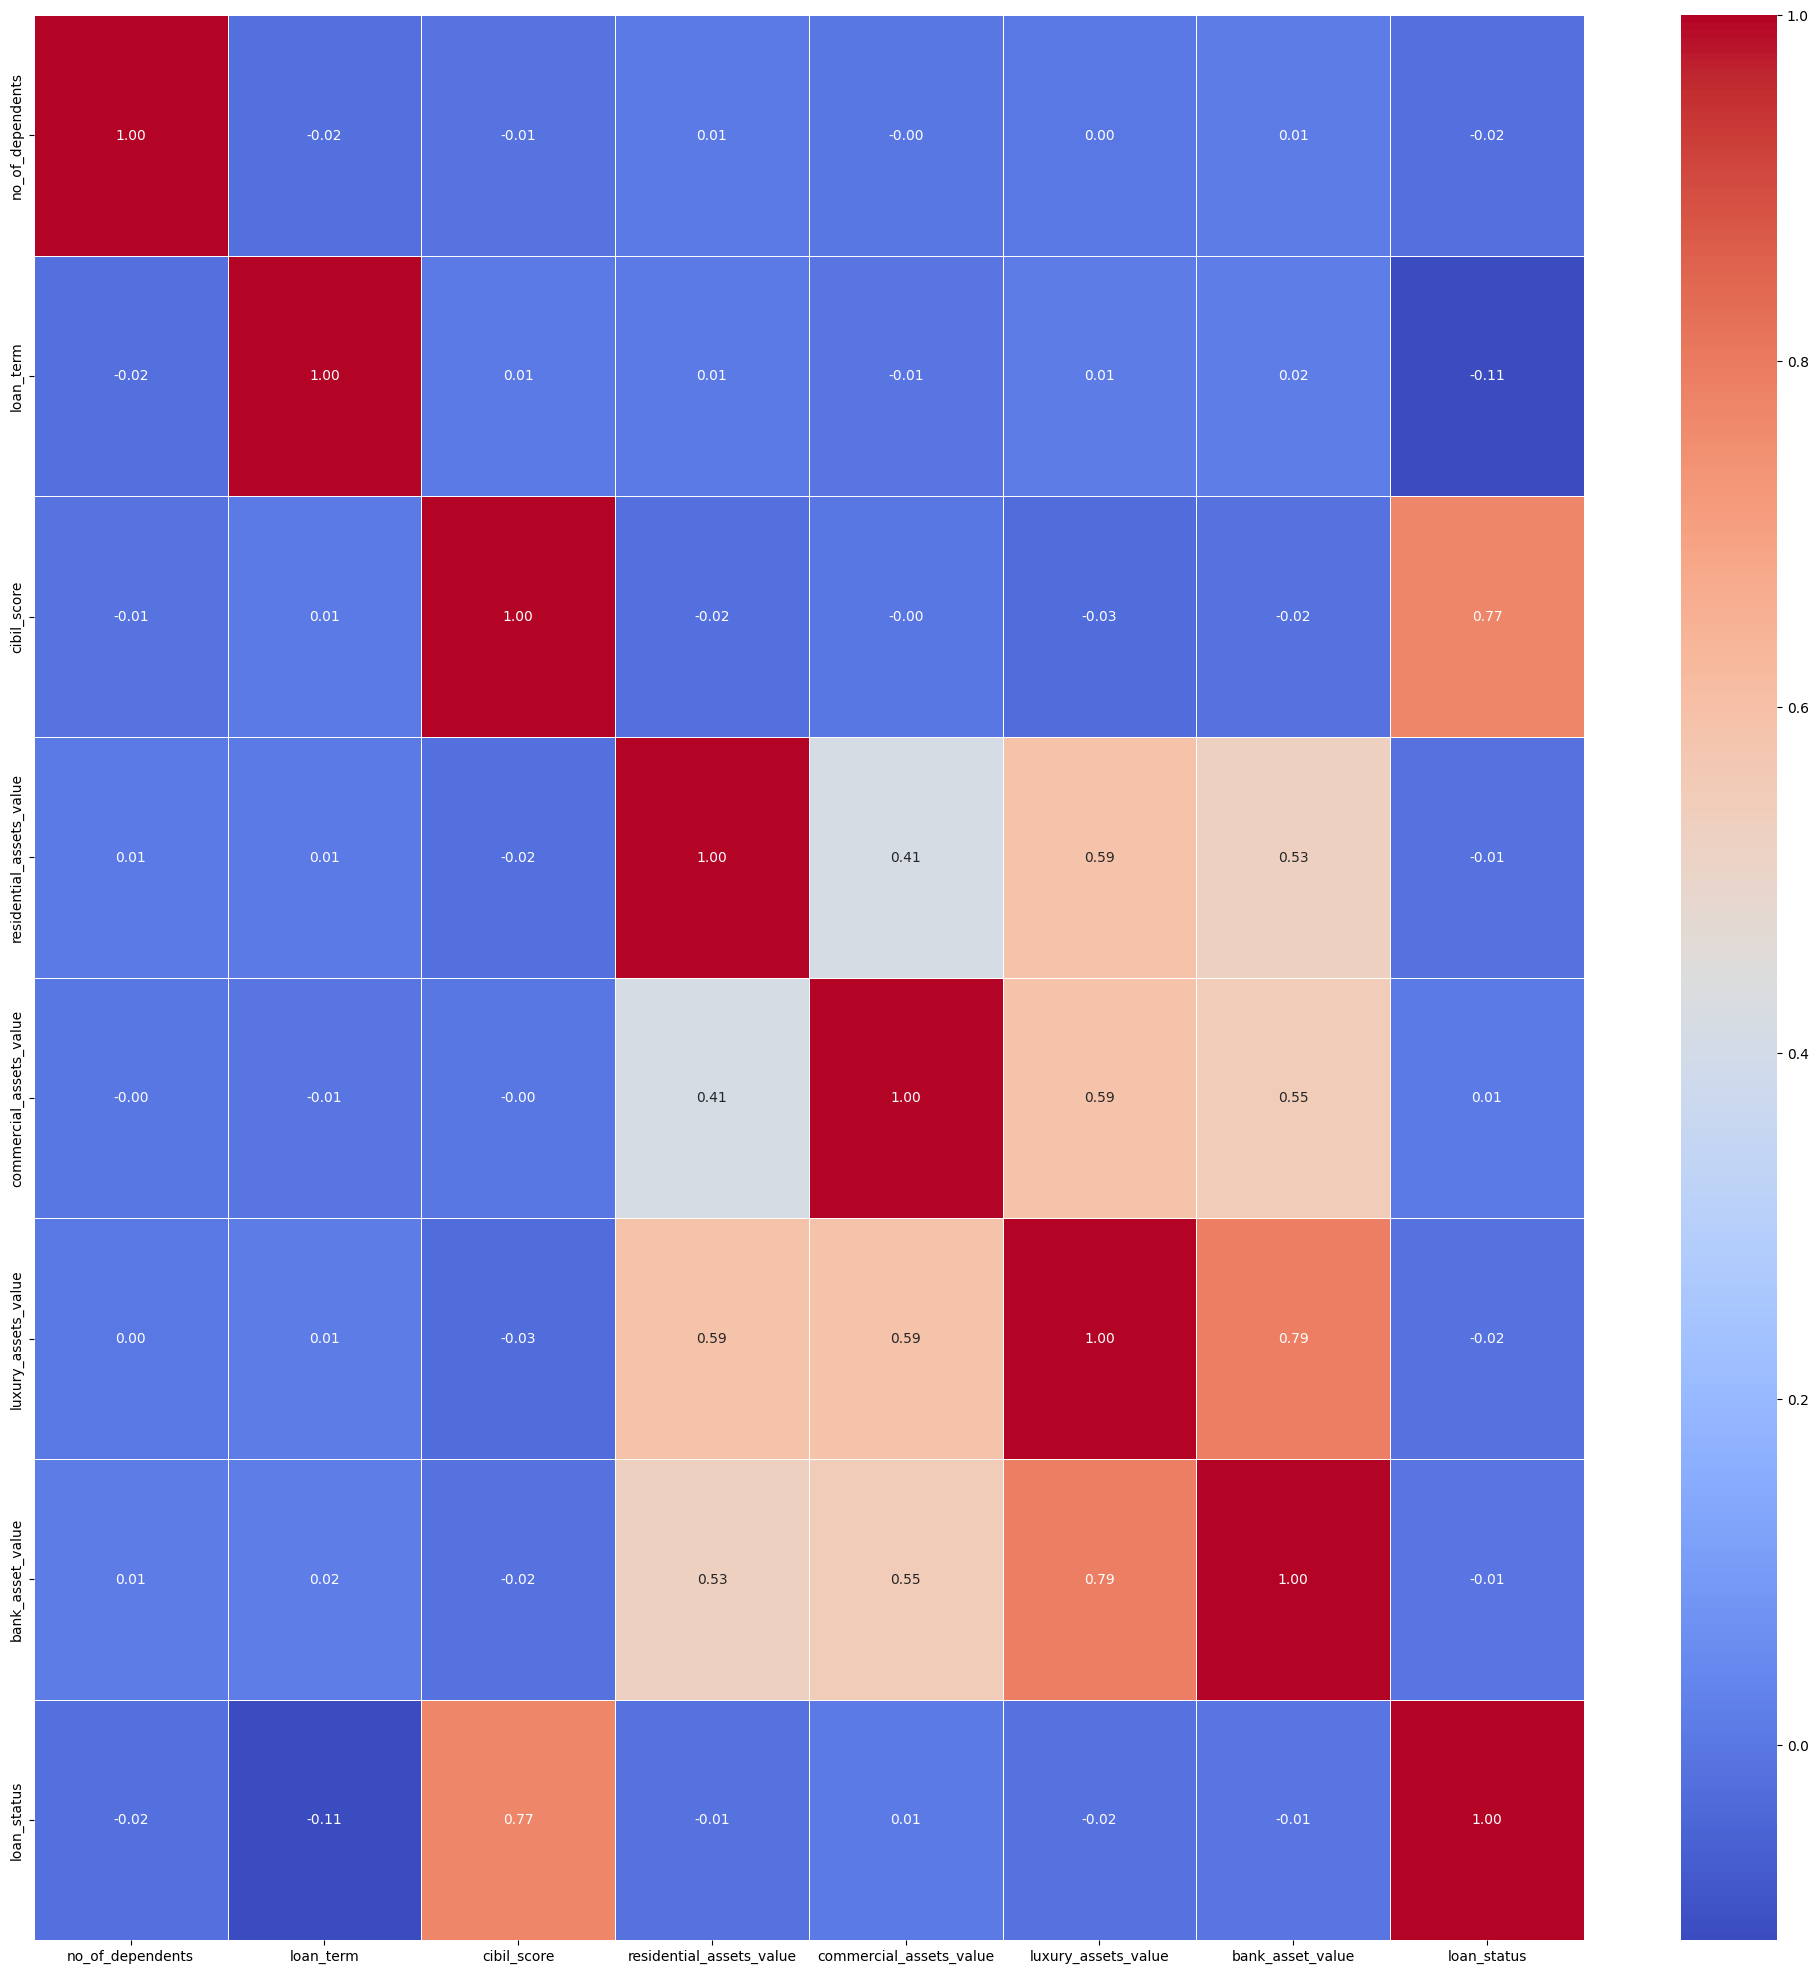

In [23]:
correlation_matrix = df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Save the figure
plt.savefig('correlation_matrix_heatmap.png', bbox_inches='tight')


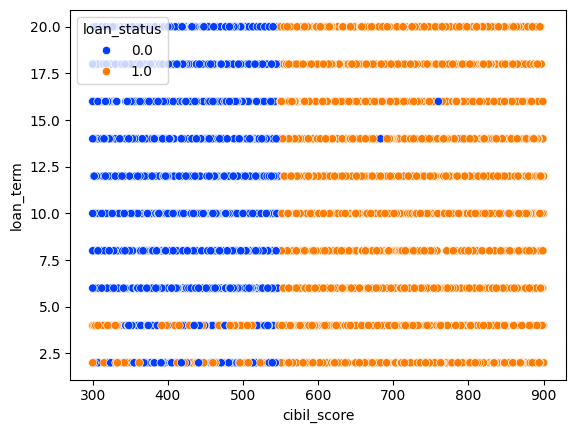

In [24]:
sns.scatterplot(x='cibil_score', y='loan_term', hue='loan_status', data=df)

# Save the figure
plt.savefig('scatter_plot.png', bbox_inches='tight')


## 5. Preparing data for modeling

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X=df.drop(['loan_status'],axis=1)
y=df['loan_status']

### FEATURE SCALING

Feature Scaling is one of the most important concept in machine learning

**Feature scaling** is the process of normalizing the range of features in a dataset. Real-world datasets often contain features that are varying in degrees of magnitude, range, and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

To do that we can use `StandardScaler` `MinMaxScalar` etc.
Again it depends on project to project and developer to developer to choose the suitable one.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

## 6. MODELING

**Steps in modelling**
There are typically 3 fundamental steps to creating and training a model.

* Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
* Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
* Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [28]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model on normalized data
history_1 = model_1.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
107/107 [==============================] - 1s 2ms/step - loss: 0.3225 - accuracy: 0.8934
Epoch 2/100
107/107 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9277
Epoch 3/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1775 - accuracy: 0.9353
Epoch 4/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1641 - accuracy: 0.9388
Epoch 5/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1548 - accuracy: 0.9447
Epoch 6/100
107/107 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9438
Epoch 7/100
107/107 [==============================] - 0s 2ms/step - loss: 0.1363 - accuracy: 0.9485
Epoch 8/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1326 - accuracy: 0.9488
Epoch 9/100
107/107 [==============================] - 0s 2ms/step - loss: 0.1261 - accuracy: 0.9490
Epoch 10/100
107/107 [==============================] - 0s 2ms/step - loss: 0.1235 - accura

In [29]:
# Evaluate our model_1 trained
model_1.evaluate(X_test_scaled,y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.1144 - accuracy: 0.9625


[0.11436950415372849, 0.9625293016433716]

In [30]:
# Making predictions on our model_1
model_1_preds=model_1.predict(X_test_scaled)

27/27 [==============================] - 0s 2ms/step


In [31]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model on normalized data
history_2 = model_2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
107/107 [==============================] - 2s 3ms/step - loss: 0.2653 - accuracy: 0.8958
Epoch 2/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1658 - accuracy: 0.9321
Epoch 3/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1421 - accuracy: 0.9370
Epoch 4/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1278 - accuracy: 0.9423
Epoch 5/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1193 - accuracy: 0.9464
Epoch 6/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1168 - accuracy: 0.9441
Epoch 7/100
107/107 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9508
Epoch 8/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1089 - accuracy: 0.9490
Epoch 9/100
107/107 [==============================] - 0s 4ms/step - loss: 0.1027 - accuracy: 0.9529
Epoch 10/100
107/107 [==============================] - 1s 5ms/step - loss: 0.1005 - accura

In [32]:
# Evaluate our model_2 trained
model_2.evaluate(X_test_scaled,y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9508


[0.16996315121650696, 0.9508196711540222]

In [33]:
# Making predictions on our model_2
model_2_preds=model_2.predict(X_test_scaled)

27/27 [==============================] - 0s 2ms/step


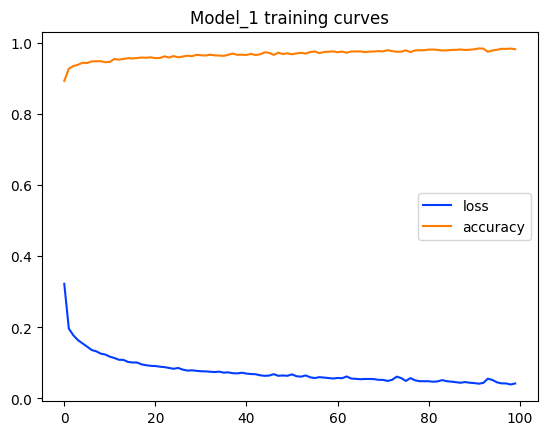

In [34]:
# Plot the loss curves of model_1
pd.DataFrame(history_1.history).plot()
plt.title("Model_1 training curves")
plt.savefig('model_1_training_curves.png', bbox_inches='tight')

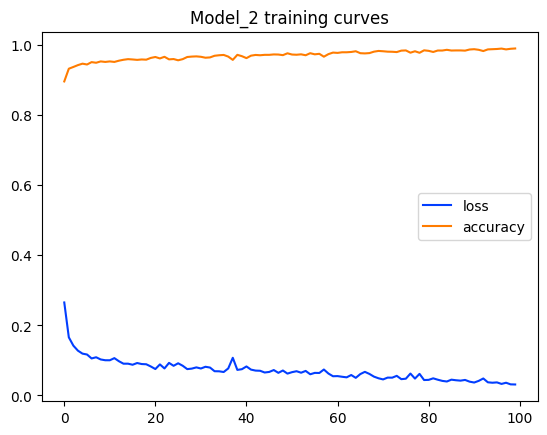

In [35]:
# Plot the loss curves of model_2
pd.DataFrame(history_2.history).plot()
plt.title("Model_2 training curves")
plt.savefig('model_2_training_curves.png', bbox_inches='tight')

In [36]:
y_pred = np.where(model_1_preds>=0.5,1,0)

In [37]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       323
         1.0       0.95      0.99      0.97       531

    accuracy                           0.96       854
   macro avg       0.97      0.95      0.96       854
weighted avg       0.96      0.96      0.96       854



## 7. Evaluating Model performance

In [38]:
# Let's create a function to display classification reports and confusion matrix of our models
def make_classification_report(y_test, model_preds):
  """
  It takes y_test (Groud truth) and the raw predictions of the model
  and displays the classification report and confusion matrix of the model..
  ('Basically it performs the above two tasks)
  """
  y_pred=np.where(model_preds>=0.5,1,0)
  cm = metrics.confusion_matrix(y_test, y_pred)
  print(classification_report(y_test, y_pred))

  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')





              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       323
         1.0       0.95      0.99      0.97       531

    accuracy                           0.96       854
   macro avg       0.97      0.95      0.96       854
weighted avg       0.96      0.96      0.96       854



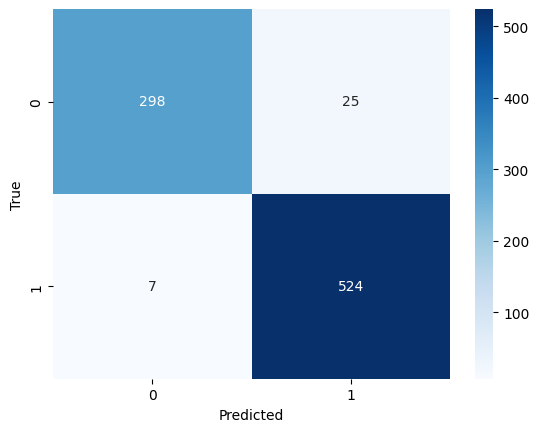

In [39]:
# Let's make the classification report of model_1
make_classification_report(y_test,model_1_preds)

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       323
         1.0       0.94      0.98      0.96       531

    accuracy                           0.95       854
   macro avg       0.95      0.94      0.95       854
weighted avg       0.95      0.95      0.95       854



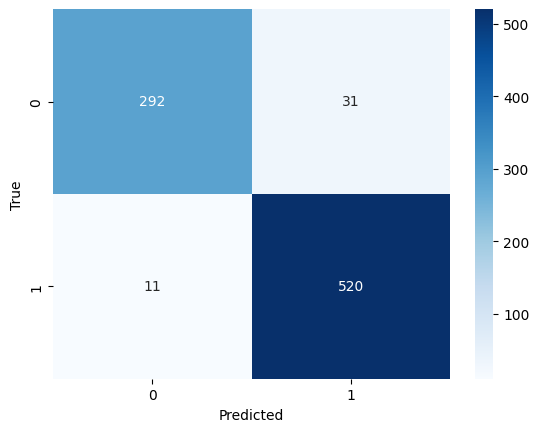

In [40]:
# Let's make the classification report of model_2
make_classification_report(y_test,model_2_preds)

## 8. Running Experiments and Improving our model

> From above we can see that model_1s performance are slightly better than model_2 so let's tweak model_1 and run some experiments

Before that Let's create a callback.

* A callback is a function that is called repeatedly during a process (for example the training of a neural network) and which generally serves to validate or correct certain behaviors. In machine learning, we can use callbacks to define what happens before, during, or at the end of a training epoch.

* **EarlyStopping** is a callback used while training neural networks, which provides us the advantage of using a large number of training epochs and stopping the training once the model's performance stops improving.

In [41]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
callback=EarlyStopping(
    monitor="accuracy",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

In [42]:
# Set random seed
tf.random.set_seed(42)

# Create a model (similar to model_1)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation='sigmoid') # ouput layer, sigmoid activation
])

# Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(), # we have changed the optimizer from ADAM to SGD
                metrics=['accuracy'])

# Fit the model on normalized data
history_3 = model_3.fit(X_train_scaled, y_train, epochs=100,callbacks=[callback])

Epoch 1/100
107/107 [==============================] - 1s 3ms/step - loss: 0.6404 - accuracy: 0.6375
Epoch 2/100
107/107 [==============================] - 0s 3ms/step - loss: 0.5519 - accuracy: 0.7262
Epoch 3/100
107/107 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.8348
Epoch 4/100
107/107 [==============================] - 0s 3ms/step - loss: 0.3932 - accuracy: 0.8852
Epoch 5/100
107/107 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.9066
Epoch 6/100
107/107 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.9171
Epoch 7/100
107/107 [==============================] - 0s 3ms/step - loss: 0.2616 - accuracy: 0.9201
Epoch 8/100
107/107 [==============================] - 0s 3ms/step - loss: 0.2445 - accuracy: 0.9204
Epoch 9/100
107/107 [==============================] - 0s 3ms/step - loss: 0.2332 - accuracy: 0.9230
Epoch 10/100
107/107 [==============================] - 0s 3ms/step - loss: 0.2253 - accura

In [43]:
#let's evaluate the model
model_3.evaluate(X_test_scaled,y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9368


[0.14081622660160065, 0.9367681741714478]

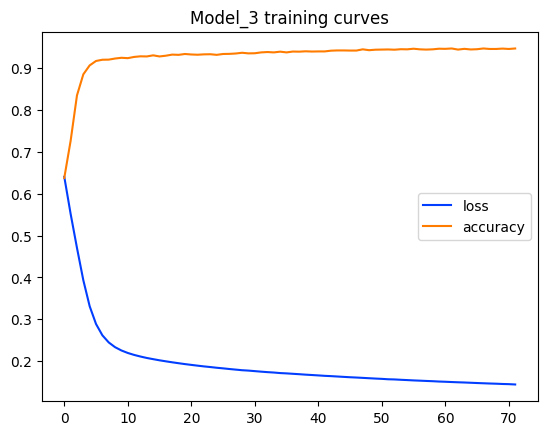

In [44]:
# Plot the loss curves of model_3
pd.DataFrame(history_3.history).plot()
plt.title("Model_3 training curves")
plt.savefig('model_3_training_curves.png', bbox_inches='tight')

In [45]:
# Making predictions on our model_3
model_3_preds=model_3.predict(X_test_scaled)

27/27 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       323
         1.0       0.95      0.95      0.95       531

    accuracy                           0.94       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.94      0.94      0.94       854



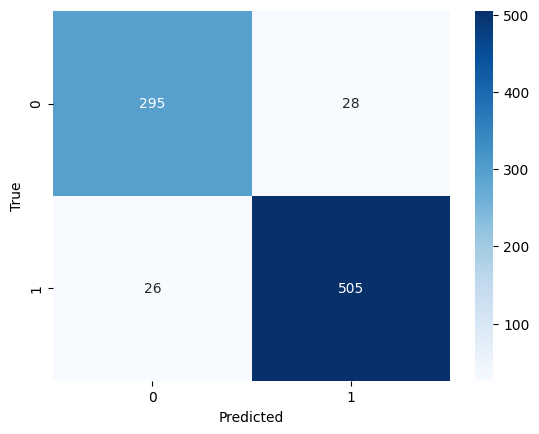

In [46]:
# Let's make the classification report of model_3
make_classification_report(y_test,model_3_preds)

The accuracy is lesser than the model_1....Let's run few more experiments

In [47]:
# Set random seed
tf.random.set_seed(42)

# Create a model (similar to model_1&3) This time we'll add more layers
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 3, ReLU activation
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 4, ReLU activation
  tf.keras.layers.Dense(1, activation='sigmoid') # ouput layer, sigmoid activation
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(), # we have changed the optimizer from ADAM to SGD
                metrics=['accuracy'])

# Fit the model on normalized data
history_4 = model_4.fit(X_train_scaled, y_train, epochs=100,callbacks=[callback])

Epoch 1/100
107/107 [==============================] - 1s 3ms/step - loss: 0.6643 - accuracy: 0.5959
Epoch 2/100
107/107 [==============================] - 0s 3ms/step - loss: 0.5924 - accuracy: 0.6410
Epoch 3/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7783
Epoch 4/100
107/107 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8761
Epoch 5/100
107/107 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.9095
Epoch 6/100
107/107 [==============================] - 0s 3ms/step - loss: 0.2400 - accuracy: 0.9171
Epoch 7/100
107/107 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9236
Epoch 8/100
107/107 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9250
Epoch 9/100
107/107 [==============================] - 0s 3ms/step - loss: 0.2026 - accuracy: 0.9277
Epoch 10/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1975 - accura

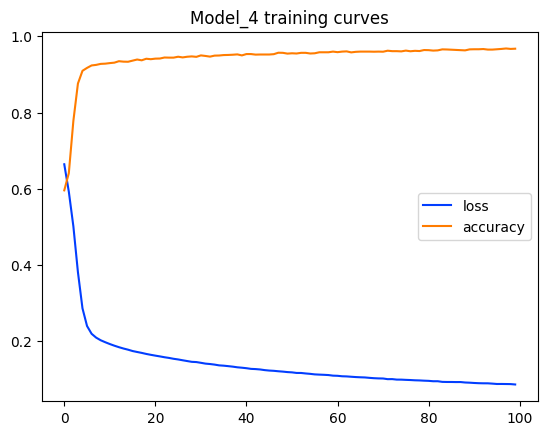

In [48]:
# Plot the loss curves of model_4
pd.DataFrame(history_4.history).plot()
plt.title("Model_4 training curves")

plt.savefig('model_4_training_curves.png', bbox_inches='tight')

In [49]:
# Making predictions on our model_4
model_4_preds=model_4.predict(X_test_scaled)

27/27 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       323
         1.0       0.96      0.96      0.96       531

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



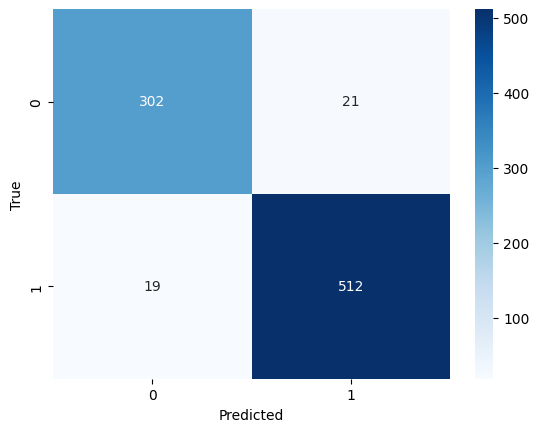

In [50]:
# Let's make the classification report of model_4
make_classification_report(y_test,model_4_preds)

The accuracy is equal to model_1 so let's proceed with another experiment

In [51]:
# Set random seed
tf.random.set_seed(42)

# Create a model (similar to model_4) This time we'll change the optimizer
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 3, ReLU activation
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 4, ReLU activation
  tf.keras.layers.Dense(1, activation='sigmoid') # ouput layer, sigmoid activation
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(), # we have changed the optimizer from SGD to Adam
                metrics=['accuracy'])

# Fit the model on normalized data
history_5 = model_5.fit(X_train_scaled, y_train, epochs=100,callbacks=[callback])

Epoch 1/100
107/107 [==============================] - 2s 4ms/step - loss: 0.2881 - accuracy: 0.8820
Epoch 2/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1817 - accuracy: 0.9288
Epoch 3/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1549 - accuracy: 0.9341
Epoch 4/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1367 - accuracy: 0.9397
Epoch 5/100
107/107 [==============================] - 0s 4ms/step - loss: 0.1245 - accuracy: 0.9482
Epoch 6/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1180 - accuracy: 0.9458
Epoch 7/100
107/107 [==============================] - 0s 4ms/step - loss: 0.1062 - accuracy: 0.9496
Epoch 8/100
107/107 [==============================] - 1s 5ms/step - loss: 0.1131 - accuracy: 0.9493
Epoch 9/100
107/107 [==============================] - 1s 5ms/step - loss: 0.0996 - accuracy: 0.9526
Epoch 10/100
107/107 [==============================] - 1s 5ms/step - loss: 0.1002 - accura

In [52]:
#let's evaluate the model
model_5.evaluate(X_test_scaled,y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.9532


[0.23262448608875275, 0.9531615972518921]

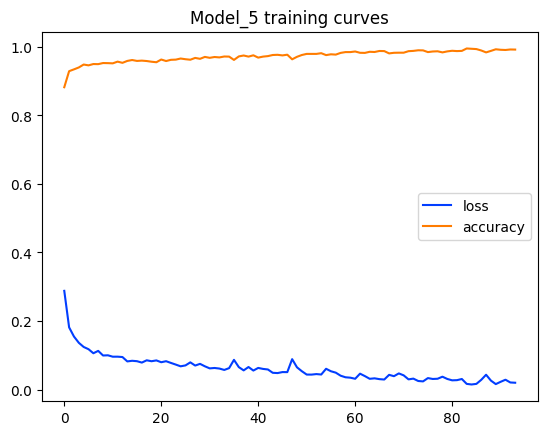

In [53]:
# Plot the loss curves of model_5
pd.DataFrame(history_5.history).plot()
plt.title("Model_5 training curves")
plt.savefig('model_5_training_curves.png', bbox_inches='tight')

In [54]:
# Making predictions on our model_5
model_5_preds=model_5.predict(X_test_scaled)

27/27 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       323
         1.0       0.96      0.97      0.96       531

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



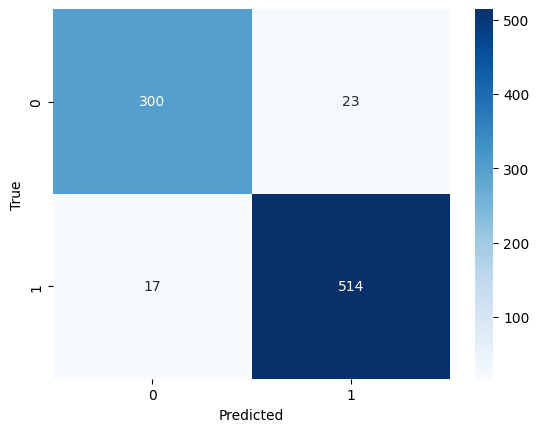

In [55]:
# Let's make the classification report of model_5
make_classification_report(y_test,model_5_preds)

In [56]:
# Set random seed
tf.random.set_seed(42)

# Create a model (similar to model_5) with an extra layer
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 3, ReLU activation
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 4, ReLU activation
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer 5, ReLU activation
  tf.keras.layers.Dense(1, activation='sigmoid') # ouput layer, sigmoid activation
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model on normalized data
history_6 = model_6.fit(X_train_scaled, y_train, epochs=100,callbacks=[callback])

Epoch 1/100
107/107 [==============================] - 2s 3ms/step - loss: 0.2782 - accuracy: 0.8799
Epoch 2/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1753 - accuracy: 0.9303
Epoch 3/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1490 - accuracy: 0.9318
Epoch 4/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1329 - accuracy: 0.9400
Epoch 5/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1253 - accuracy: 0.9447
Epoch 6/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1136 - accuracy: 0.9473
Epoch 7/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1023 - accuracy: 0.9493
Epoch 8/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1050 - accuracy: 0.9485
Epoch 9/100
107/107 [==============================] - 0s 4ms/step - loss: 0.1047 - accuracy: 0.9508
Epoch 10/100
107/107 [==============================] - 0s 3ms/step - loss: 0.0967 - accura

In [57]:
#let's evaluate the model
model_6.evaluate(X_test_scaled,y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9496


[0.15990328788757324, 0.9496487379074097]

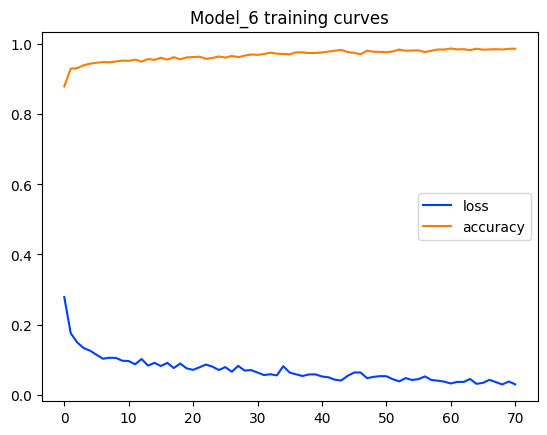

In [58]:
# Plot the loss curves of model_6
pd.DataFrame(history_6.history).plot()
plt.title("Model_6 training curves")
plt.savefig('model_6_training_curves.png', bbox_inches='tight')

In [59]:
# Making predictions on our model_6
model_6_preds=model_6.predict(X_test_scaled)

27/27 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       323
         1.0       0.96      0.96      0.96       531

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



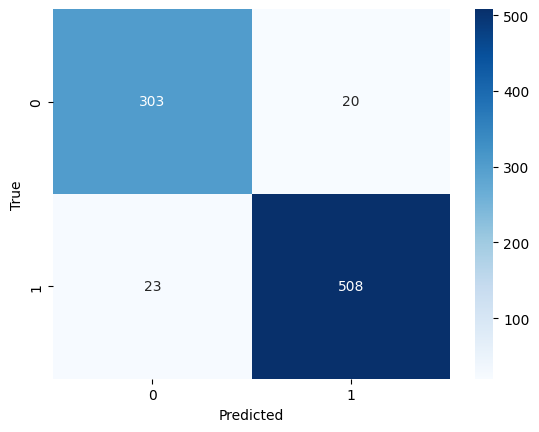

In [60]:
# Let's make the classification report of model_6
make_classification_report(y_test,model_6_preds)

In [61]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


## 9. Hyperparameter tuning

> Till Now we've ran experiments by our hand and tried to improve our model's performance which took a lot of time.

Another way we can do this is by HyperParameter tuning.

> Hyperparameter tuning automates the process and run experiments in shorter time ultimately saving time between the experiments.

In [62]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Define a Hypermodel
def build_model(hp):
    model = tf.keras.Sequential()
    # Tune the number of units in the first Dense layer
    hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
    model.add(tf.keras.layers.Dense(units=hp_units1, activation='relu'))

    # Tune the number of layers and units
    for i in range(hp.Int('num_layers', 1, 5)):
        hp_units = hp.Int('units_' + str(i), min_value=32, max_value=512, step=32)
        model.add(tf.keras.layers.Dense(units=hp_units, activation='relu'))

    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy'])

    return model


# Create a tuner object
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # You can increase the number of trials to search more thoroughly
    executions_per_trial=2,  # Number of times to train each model with different weights
    directory='my_dir',
    project_name='loan_approval_prediction')

# Run the hyperparameter search
tuner.search(X_train_scaled, y_train,
             epochs=100,
             validation_split=0.2,  # Use 20% of the training data for validation
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_7 = tuner.hypermodel.build(best_hps)

# Train the best model
history_7 = model_7.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model_7.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')

Trial 10 Complete [00h 00m 26s]
val_accuracy: 0.9399707317352295

Best val_accuracy So Far: 0.949487566947937
Total elapsed time: 00h 08m 08s
Epoch 1/100
86/86 [==============================] - 2s 7ms/step - loss: 0.2493 - accuracy: 0.8971 - val_loss: 0.2291 - val_accuracy: 0.9107
Epoch 2/100
86/86 [==============================] - 0s 5ms/step - loss: 0.1806 - accuracy: 0.9191 - val_loss: 0.2157 - val_accuracy: 0.9209
Epoch 3/100
86/86 [==============================] - 0s 5ms/step - loss: 0.1472 - accuracy: 0.9319 - val_loss: 0.2479 - val_accuracy: 0.9165
Epoch 4/100
86/86 [==============================] - 0s 5ms/step - loss: 0.1368 - accuracy: 0.9374 - val_loss: 0.1636 - val_accuracy: 0.9356
Epoch 5/100
86/86 [==============================] - 0s 5ms/step - loss: 0.1261 - accuracy: 0.9414 - val_loss: 0.1561 - val_accuracy: 0.9268
Epoch 6/100
86/86 [==============================] - 0s 5ms/step - loss: 0.1280 - accuracy: 0.9356 - val_loss: 0.1288 - val_accuracy: 0.9502
Epoch 7/100


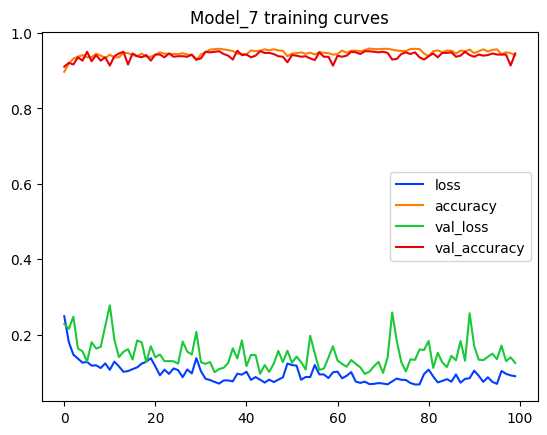

In [63]:
# Plot the loss curves of model_7
pd.DataFrame(history_7.history).plot()
plt.title("Model_7 training curves")
plt.savefig('model_7_training_curves.png', bbox_inches='tight')

In [64]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Define a Hypermodel
def build_model(hp):
    model = tf.keras.Sequential()

    # First layer
    hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
    hp_activation1 = hp.Choice('activation1', values=['relu', 'leaky_relu', 'elu', 'swish', 'linear'])
    model.add(tf.keras.layers.Dense(units=hp_units1, activation=hp_activation1))

    # Tune the number of layers and units
    for i in range(hp.Int('num_layers', 1, 5)):
        hp_units = hp.Int('units_' + str(i), min_value=32, max_value=512, step=32)
        hp_activation = hp.Choice('activation_' + str(i), values=['relu', 'leaky_relu', 'elu', 'swish', 'linear'])
        model.add(tf.keras.layers.Dense(units=hp_units, activation=hp_activation))
        if hp.Boolean('batch_norm_' + str(i)):
            model.add(tf.keras.layers.BatchNormalization())
        if hp.Boolean('dropout_' + str(i)):
            model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout_rate_' + str(i), min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'nadam', 'adagrad', 'adadelta', 'sgd'])

    if hp_optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
    elif hp_optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate)
    elif hp_optimizer == 'nadam':
        optimizer = tf.keras.optimizers.Nadam(learning_rate=hp_learning_rate)
    elif hp_optimizer == 'adagrad':
        optimizer = tf.keras.optimizers.Adagrad(learning_rate=hp_learning_rate)
    elif hp_optimizer == 'adadelta':
        optimizer = tf.keras.optimizers.Adadelta(learning_rate=hp_learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp_learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy'])

    return model



# Create a tuner object
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,  # Increase the number of trials for a more thorough search
    executions_per_trial=2,  # Number of times to train each model with different weights
    directory='my_dir',
    project_name='loan_approval_prediction_v3')

# Run the hyperparameter search
tuner.search(X_train_scaled, y_train,
             epochs=100,
             validation_split=0.2,  # Use 20% of the training data for validation
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_8 = tuner.hypermodel.build(best_hps)

# Train the best model
history_8 = model_8.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model_8.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')


Trial 20 Complete [00h 00m 27s]
val_accuracy: 0.9436310529708862

Best val_accuracy So Far: 0.9487555027008057
Total elapsed time: 00h 31m 33s
Epoch 1/100
86/86 [==============================] - 2s 10ms/step - loss: 0.3587 - accuracy: 0.8569 - val_loss: 0.5683 - val_accuracy: 0.8858
Epoch 2/100
86/86 [==============================] - 1s 8ms/step - loss: 0.2529 - accuracy: 0.8960 - val_loss: 0.3491 - val_accuracy: 0.9268
Epoch 3/100
86/86 [==============================] - 1s 7ms/step - loss: 0.2221 - accuracy: 0.9023 - val_loss: 0.2327 - val_accuracy: 0.9283
Epoch 4/100
86/86 [==============================] - 1s 8ms/step - loss: 0.2168 - accuracy: 0.9096 - val_loss: 0.2141 - val_accuracy: 0.9268
Epoch 5/100
86/86 [==============================] - 1s 10ms/step - loss: 0.1939 - accuracy: 0.9085 - val_loss: 0.2319 - val_accuracy: 0.8960
Epoch 6/100
86/86 [==============================] - 1s 12ms/step - loss: 0.1722 - accuracy: 0.9250 - val_loss: 0.1802 - val_accuracy: 0.9268
Epoch 7/

In [65]:
# Let's see the best performing model
model_8.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 352)               2816      
                                                                 
 dense_5 (Dense)             (None, 128)               45184     
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 512)               66048     
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                16416     
                                                      

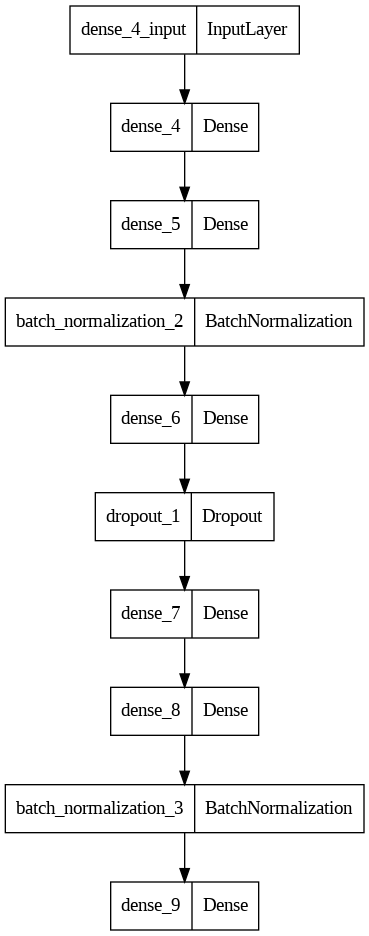

In [66]:
#Let's plot the best model
from tensorflow.keras.utils import plot_model
plot_model(model_8)

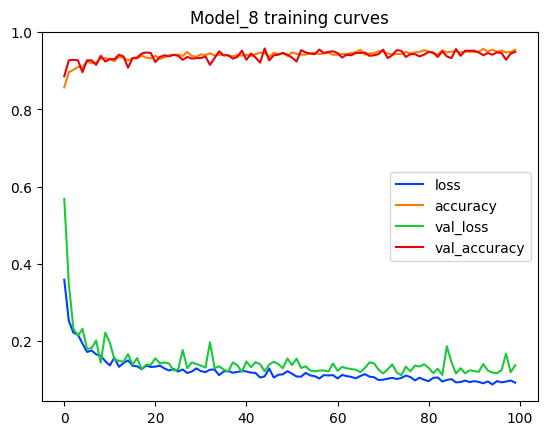

In [67]:
# Plot the loss curves of model_8
pd.DataFrame(history_8.history).plot()
plt.title("Model_8 training curves")
plt.savefig('model_8_training_curves.png', bbox_inches='tight')

**CONCLUSION:** As we can see the accuracy has not much improved even after so many experiments and hypertuning this signifies that this is the best performance we can get on this dataset.

However improving a model's performance is highly experimental and approach depends on developer to developer.

**Common steps for improving a model's performance are:**

- Get more data
- Add more layers

Experiments may not give the fruitful results as expected everytime but it's always a good approach to perform lots of experiments in machine learning.
